# AI ODYSSSEY: CNN ASSIGNMENT

## CONVOLUTIONAL NEURAL NETWORKS

In this assignment, we'll first learn about the individual components of a CNN, and then build one!

### FILTERS

Filters are the most unique part of a CNN. They make the bulk of the convolutional layers of a CNN, and thus differentiate it from a normal neural network.

**Describe the following filters:**
- averaging filter:
- gaussian filter:
- median filter:
- unsharp masking:
- prewitt filter:
- sobel filter:
- laplacian filter:

**Now give an example of application of each of these filters. You are required to load an image of your choice. Then, apply these filters to those images and display the image before and after convolution.**


In [1]:
!pip install opencv-python-headless

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iamge.jpg to iamge.jpg


**Averaging Filter**

NameError: name 'kernel_size' is not defined

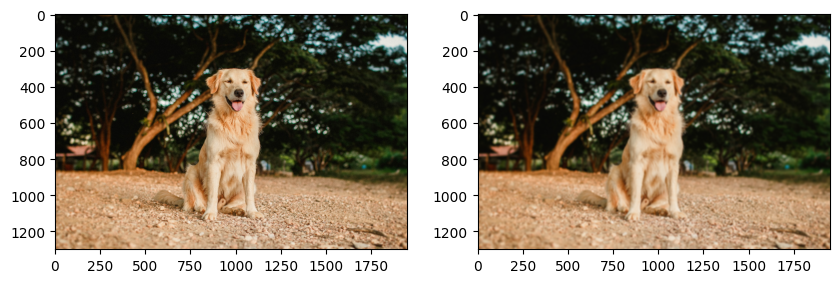

**Gaussian Filter**

In [ ]:
#ENTER YOUR CODE HERE

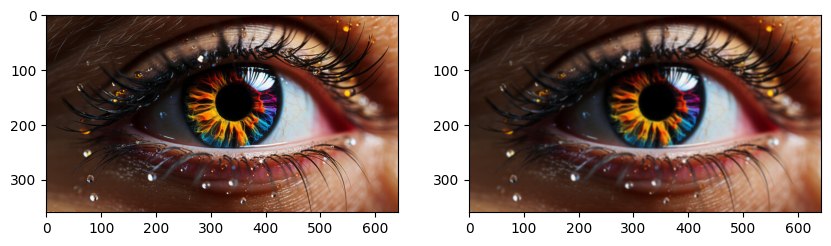

**Median Filter**

In [ ]:
#ENTER YOUR CODE HERE

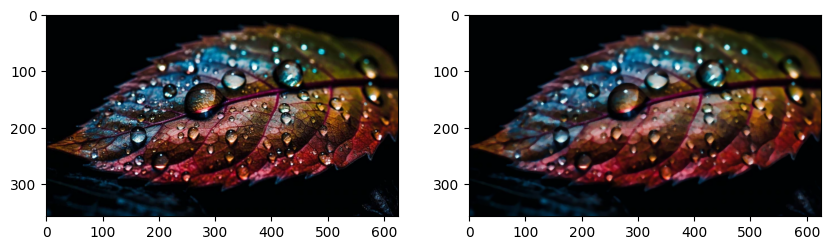

The nice images were for fun.

**Blurring is actually used for noise removal. Demonstrate.**

In [ ]:
#ENTER YOUR CODE HERE

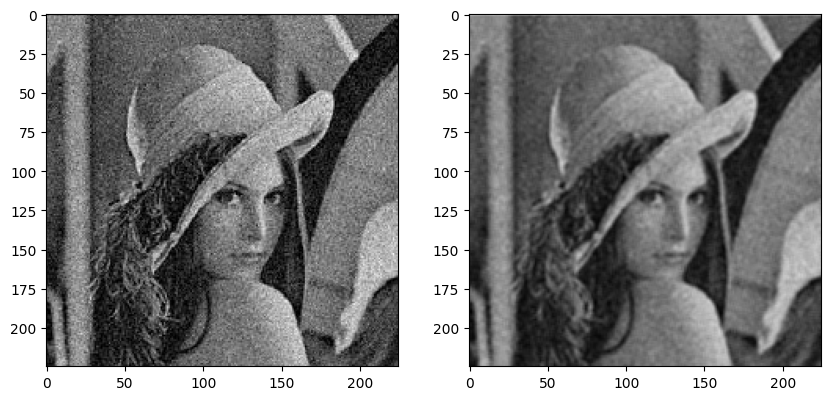

**Unsharp Masking**

In [ ]:
#ENTER YOUR CODE HERE

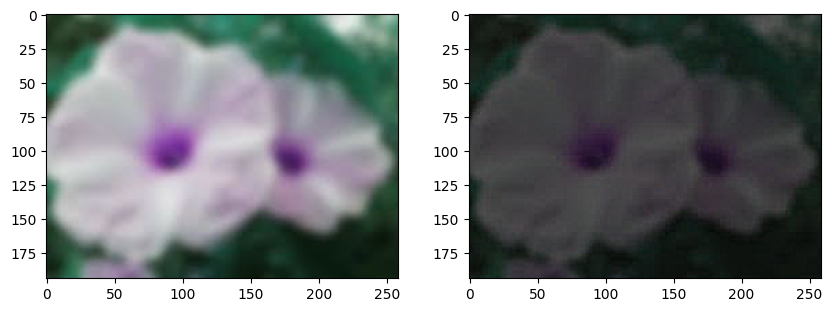

**Prewitt Horizontal Filter**

In [ ]:
#ENTER YOUR CODE HERE

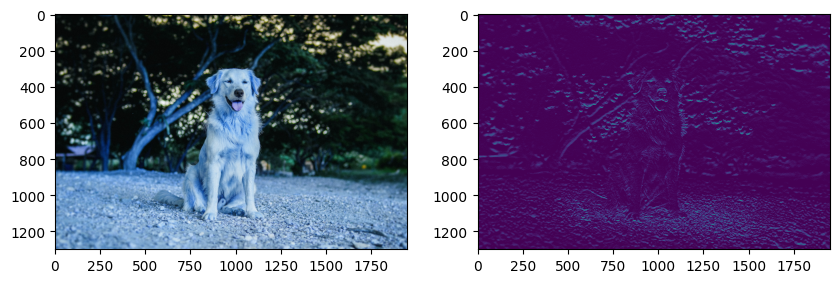

**Prewitt Vertical Filter**

In [ ]:
#ENTER YOUR CODE HERE

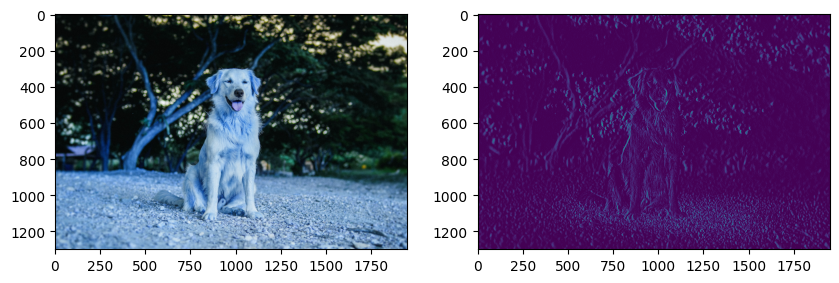

**Combined Prewitt**

In [ ]:
#ENTER YOUR CODE HERE

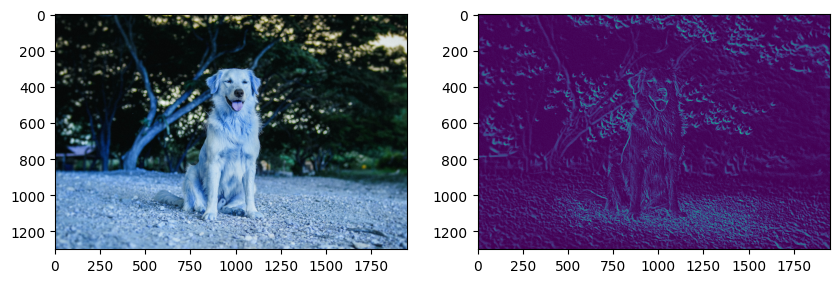

**Sobel Filter**

In [ ]:
#ENTER YOUR CODE HERE

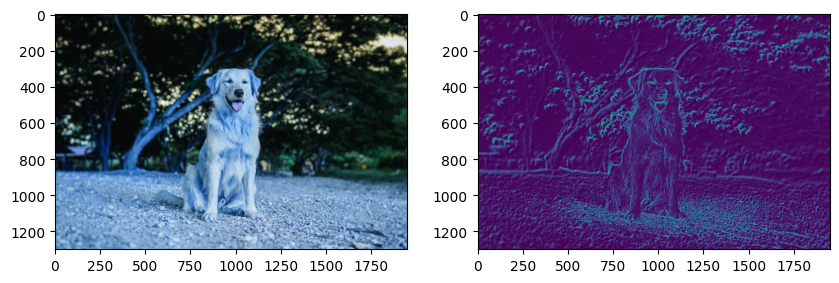

As you can see, the quality of sobel filter is better than that of combined prewitt.

**Laplacian Filter**

In [ ]:
#ENTER YOUR CODE HERE

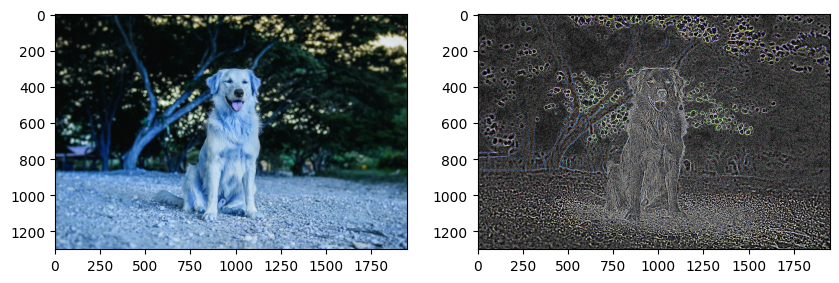

### BUILDING A BASIC MODEL
Perhaps the most basic CNN application is handwritten digit recognition. We will develop a model for the same.

In [6]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**What is the no. of elements in the training and testing datasets?**

In [7]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


No. of elements in training dataset: 60000
No. of elements in testing dataset: 10000


**What are the labels in the dataset?**

In [11]:
unique_labels=np.unique(y_train)
print(unique_labels)


[0 1 2 3 4 5 6 7 8 9]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Visualise one image for each label.**

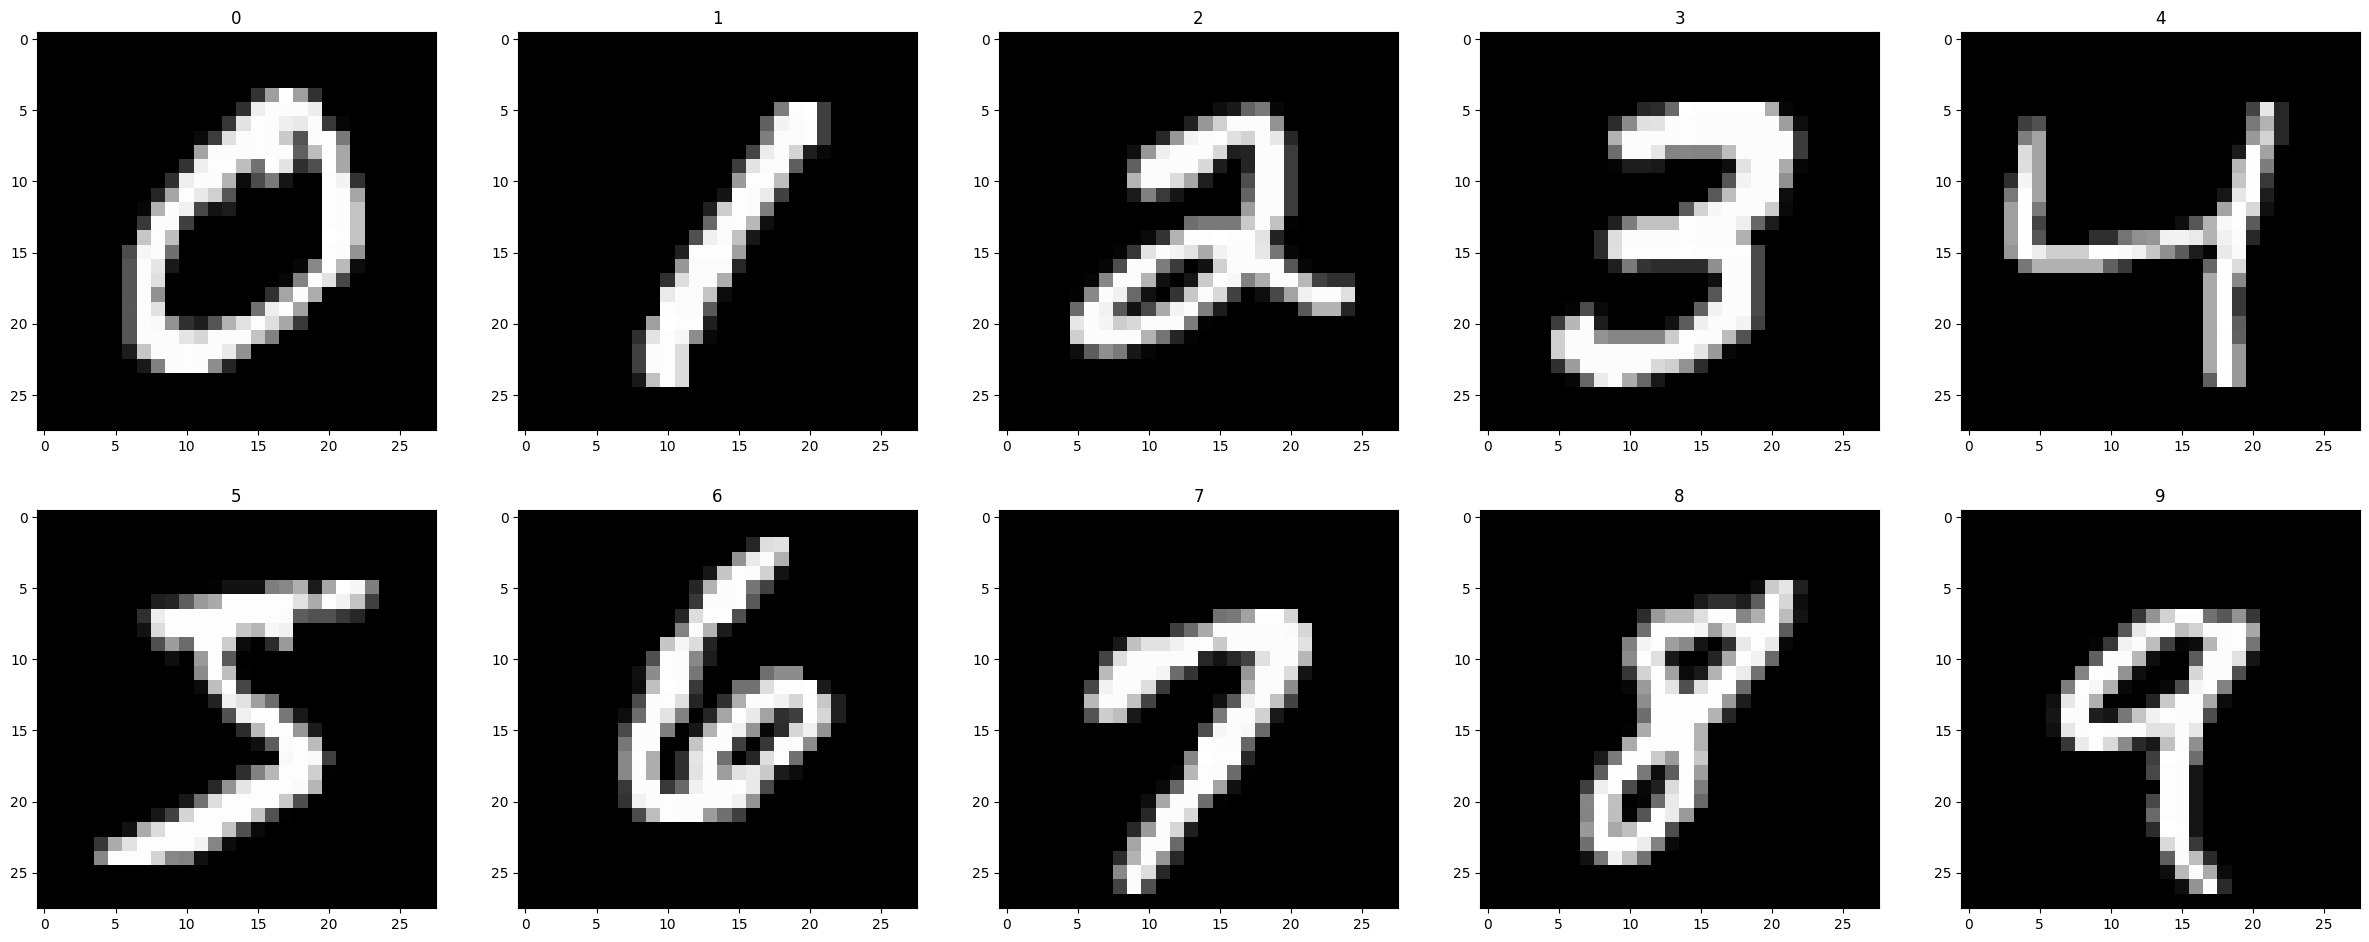

**One-hot encode the y labels.**

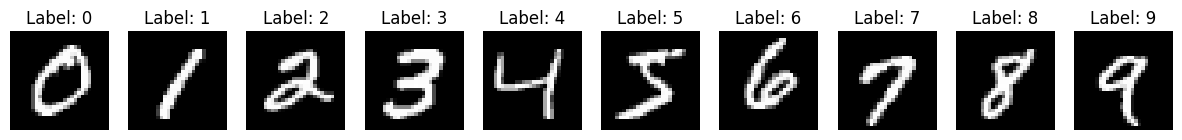

In [12]:
fig, axs = plt.subplots(1, len(unique_labels), figsize=(15, 15))
for i, label in enumerate(unique_labels):
    index = np.where(y_train == label)[0][0]

    image = X_train[index]

    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(f"Label: {label}")
    axs[i].axis('off')

plt.show()

**Let's see what every image looks like! Print the pixel array of any one image, and then display the image as well.**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

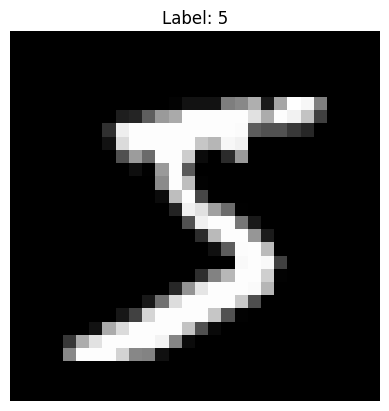

In [13]:
image=X_train[0]
print(image)
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

The shape of each element is: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0

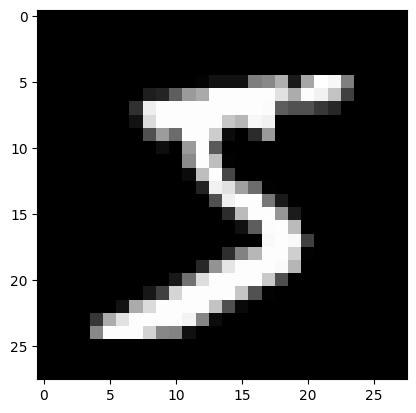

**Change the dimension of the training and testing datasets for it to become a 3D one. Remember this is a grayscale image.**

In [15]:
from tensorflow.keras.utils import to_categorical

X_train_3d = X_train.reshape(-1, 28, 28, 1)
X_test_3d = X_test.reshape(-1, 28, 28, 1)
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

**The last step in the preparation of the dataset is normalisation of the pixel values.**

In [16]:
X_train_3d  = X_train_3d/255
X_test_3d = X_test_3d/255

**Now we begin training. Compile a model that has 1 convolutional layer with 32 filters, followed by a max pooling layer, followed by another convolutional layer with 64 filters, followed by a max pooling layer and finally dense layers.**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

**Compile the model with Adam optimizer, and a suitable loss function. Use accuracy as the metric for training.**

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Now split the dataset into a validation part.**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_3d, y_train_categorical, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

**Fit the model and plot the training history.**

In [21]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1407/1407 [==============================] - 58s 40ms/step - loss: 0.1546 - accuracy: 0.9538 - val_loss: 0.0609 - val_accuracy: 0.9812
Epoch 2/10
1407/1407 [==============================] - 61s 44ms/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0517 - val_accuracy: 0.9837
Epoch 3/10
1407/1407 [==============================] - 53s 38ms/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.0397 - val_accuracy: 0.9875
Epoch 4/10
1407/1407 [==============================] - 54s 39ms/step - loss: 0.0243 - accuracy: 0.9921 - val_loss: 0.0418 - val_accuracy: 0.9884
Epoch 5/10
1407/1407 [==============================] - 63s 45ms/step - loss: 0.0174 - accuracy: 0.9942 - val_loss: 0.0425 - val_accuracy: 0.9885
Epoch 6/10
1407/1407 [==============================] - 71s 51ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0493 - val_accuracy: 0.9879
Epoch 7/10
1407/1407 [==============================] - 61s 43ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0464 -

Epoch 1/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0608 - val_accuracy: 0.9815
Epoch 2/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0504 - accuracy: 0.9841 - val_loss: 0.0514 - val_accuracy: 0.9851
Epoch 3/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0550 - val_accuracy: 0.9847
Epoch 4/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0494 - val_accuracy: 0.9862
Epoch 6/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0418 - val_accuracy: 0.9880
Epoch 7/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0377 -

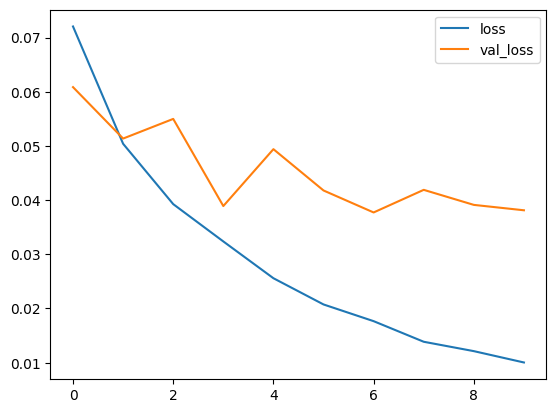

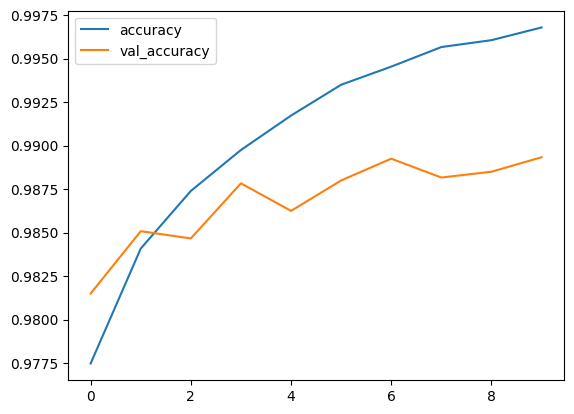

**Now test your model on the training dataset and print the classification matrix.**

In [22]:
from sklearn.metrics import confusion_matrix
_, test_accuracy = model.evaluate(X_test_3d, y_test_categorical)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

y_test_pred = model.predict(X_test_3d)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
print("Classification matrix Matrix on Testing Data:")
print(confusion_matrix(y_test, y_test_pred_classes))

313/313 [==============================] - 5s 15ms/step - loss: 0.0383 - accuracy: 0.9915
Test accuracy: 99.15%
313/313 [==============================] - 3s 9ms/step
Classification matrix Matrix on Testing Data:
[[ 974    0    1    0    2    0    0    1    1    1]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   2    1 1019    1    1    0    1    6    1    0]
 [   0    0    0 1004    0    3    0    1    2    0]
 [   0    0    0    0  976    0    2    0    0    4]
 [   2    0    0    5    0  882    2    0    1    0]
 [   3    2    0    0    1    6  945    0    1    0]
 [   0    2    1    1    1    0    0 1019    0    4]
 [   3    1    1    2    0    3    0    1  960    3]
 [   0    0    0    0    4    2    0    1    1 1001]]


313/313 [==============================] - 6s 19ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Lets visualise the prediction, along with the input now.**

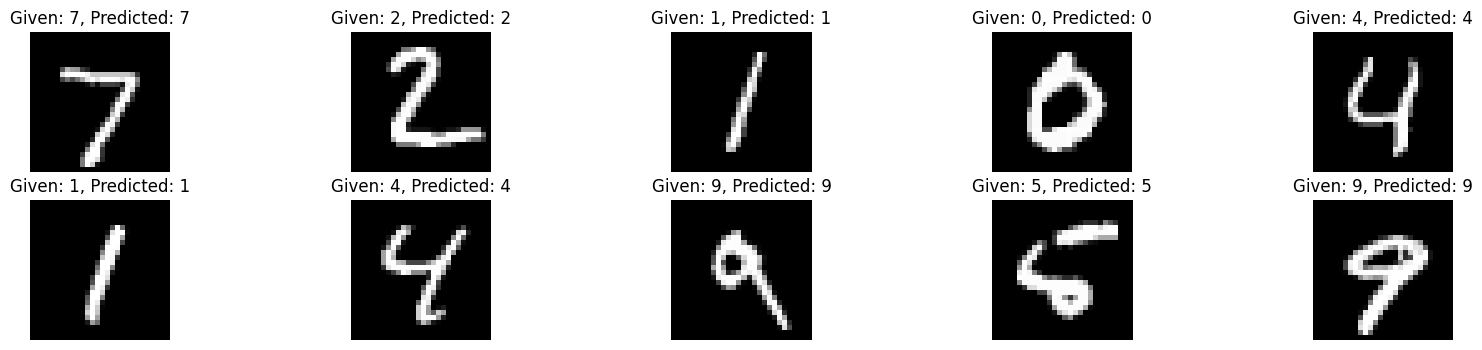

In [24]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Given: {y_test[i]}, Predicted: {y_test_pred_classes[i]}")
    plt.axis('off')
plt.show()

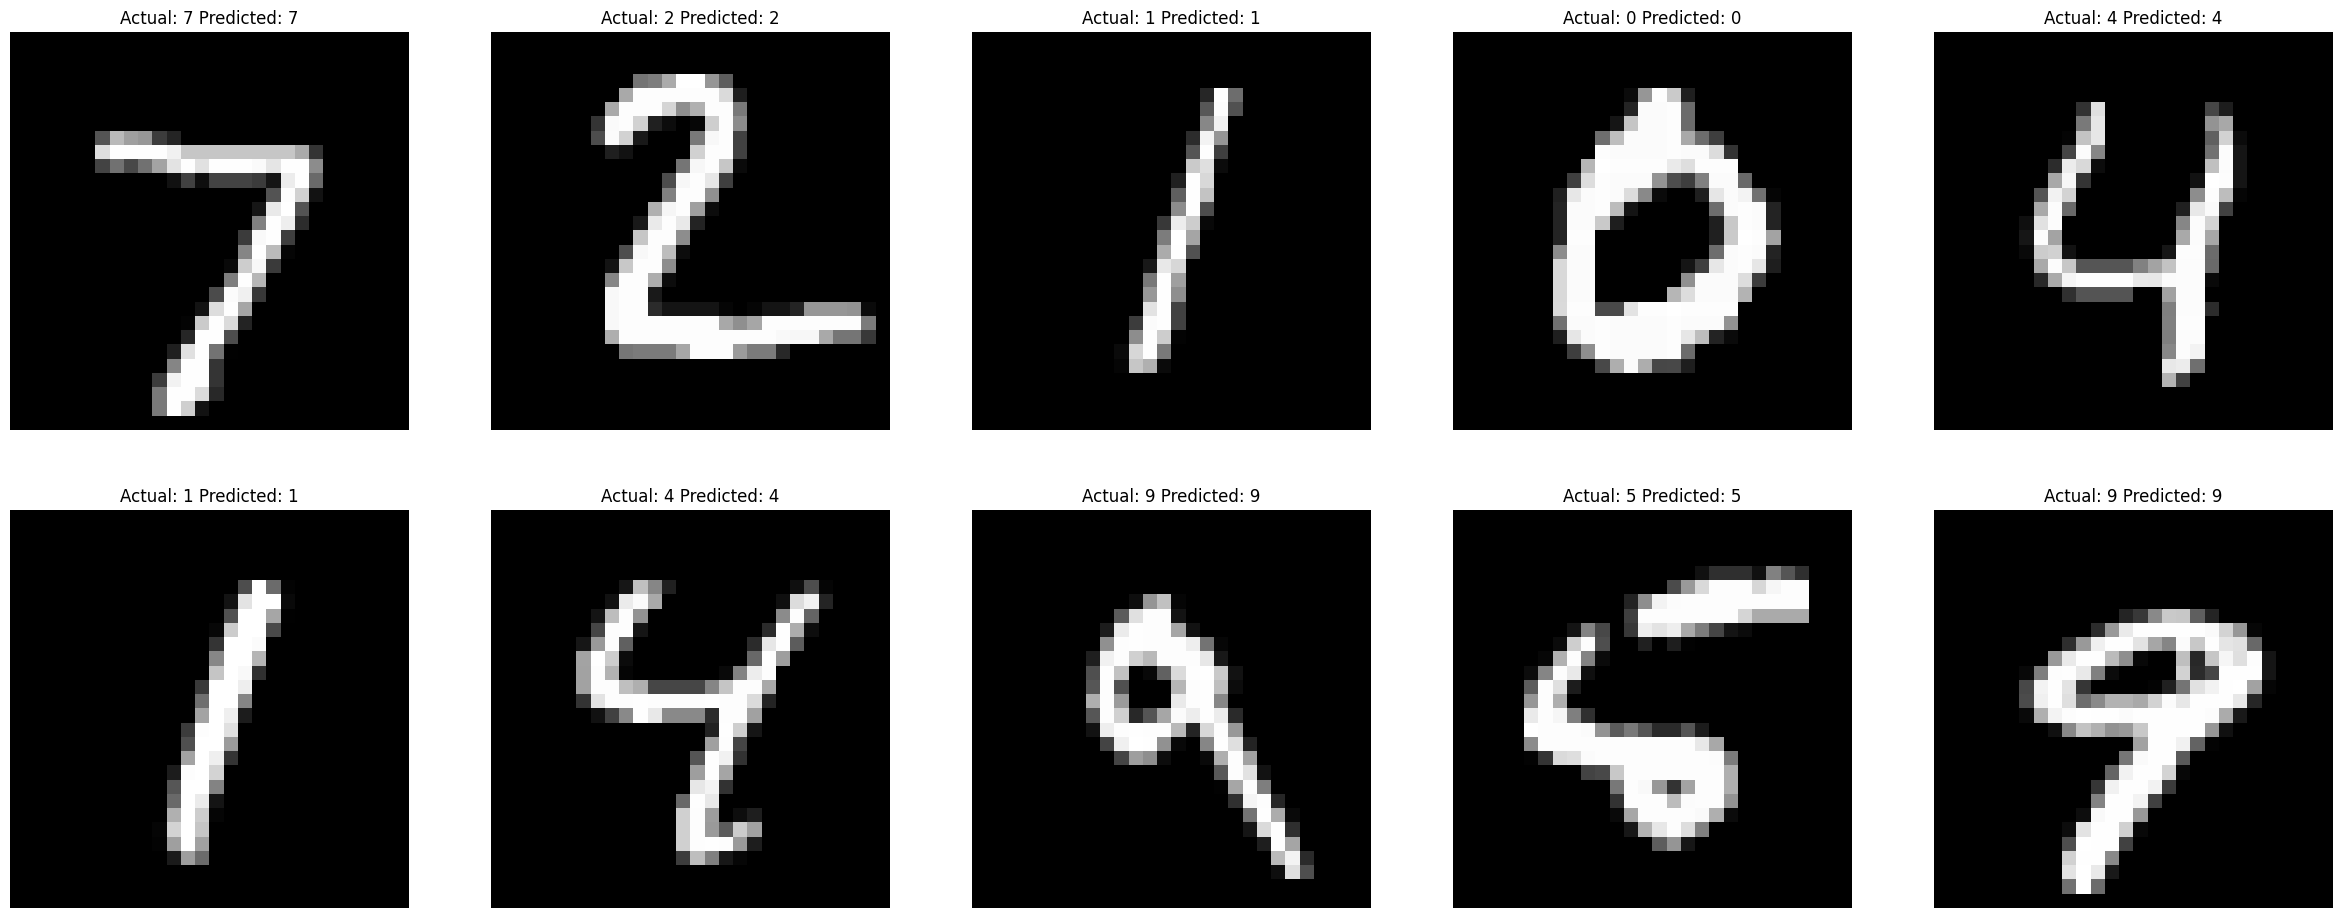

**But what did the convolution layers do? Lets visualise the outputs of filters for the first test image.**

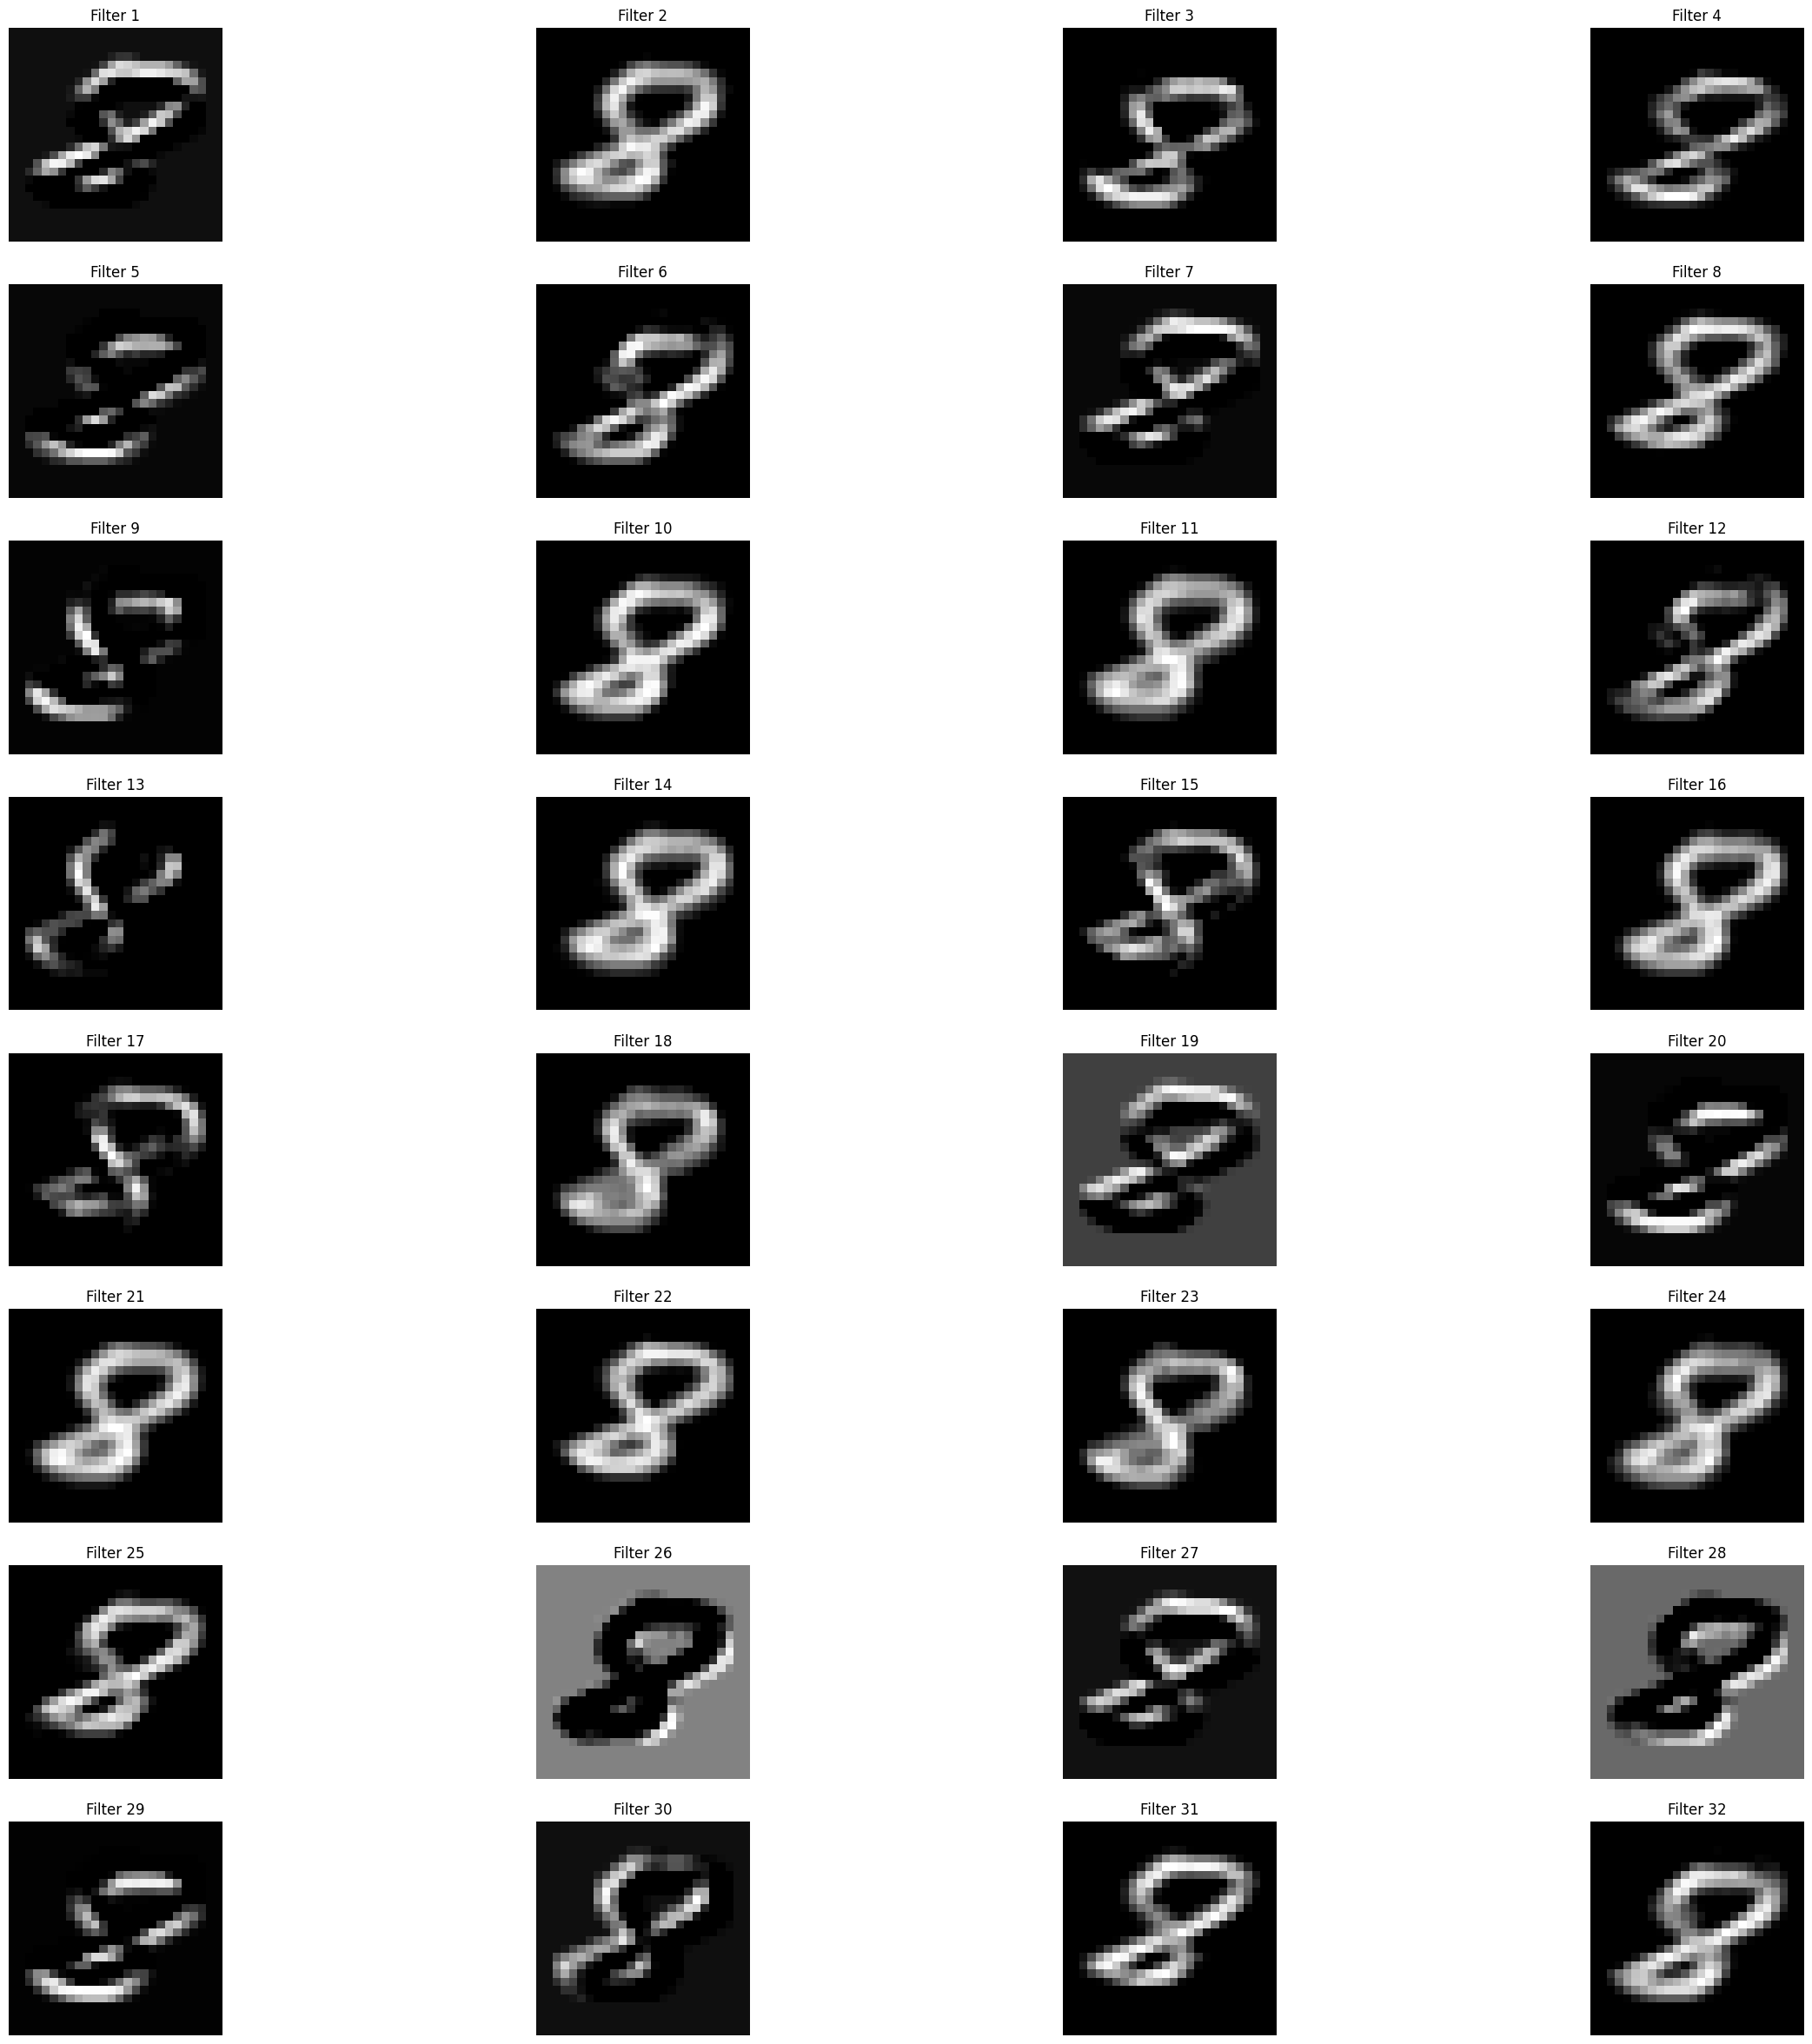

**Do the same for the output of the max pooling layer.**

In [ ]:
#ENTER YOUR CODE HERE

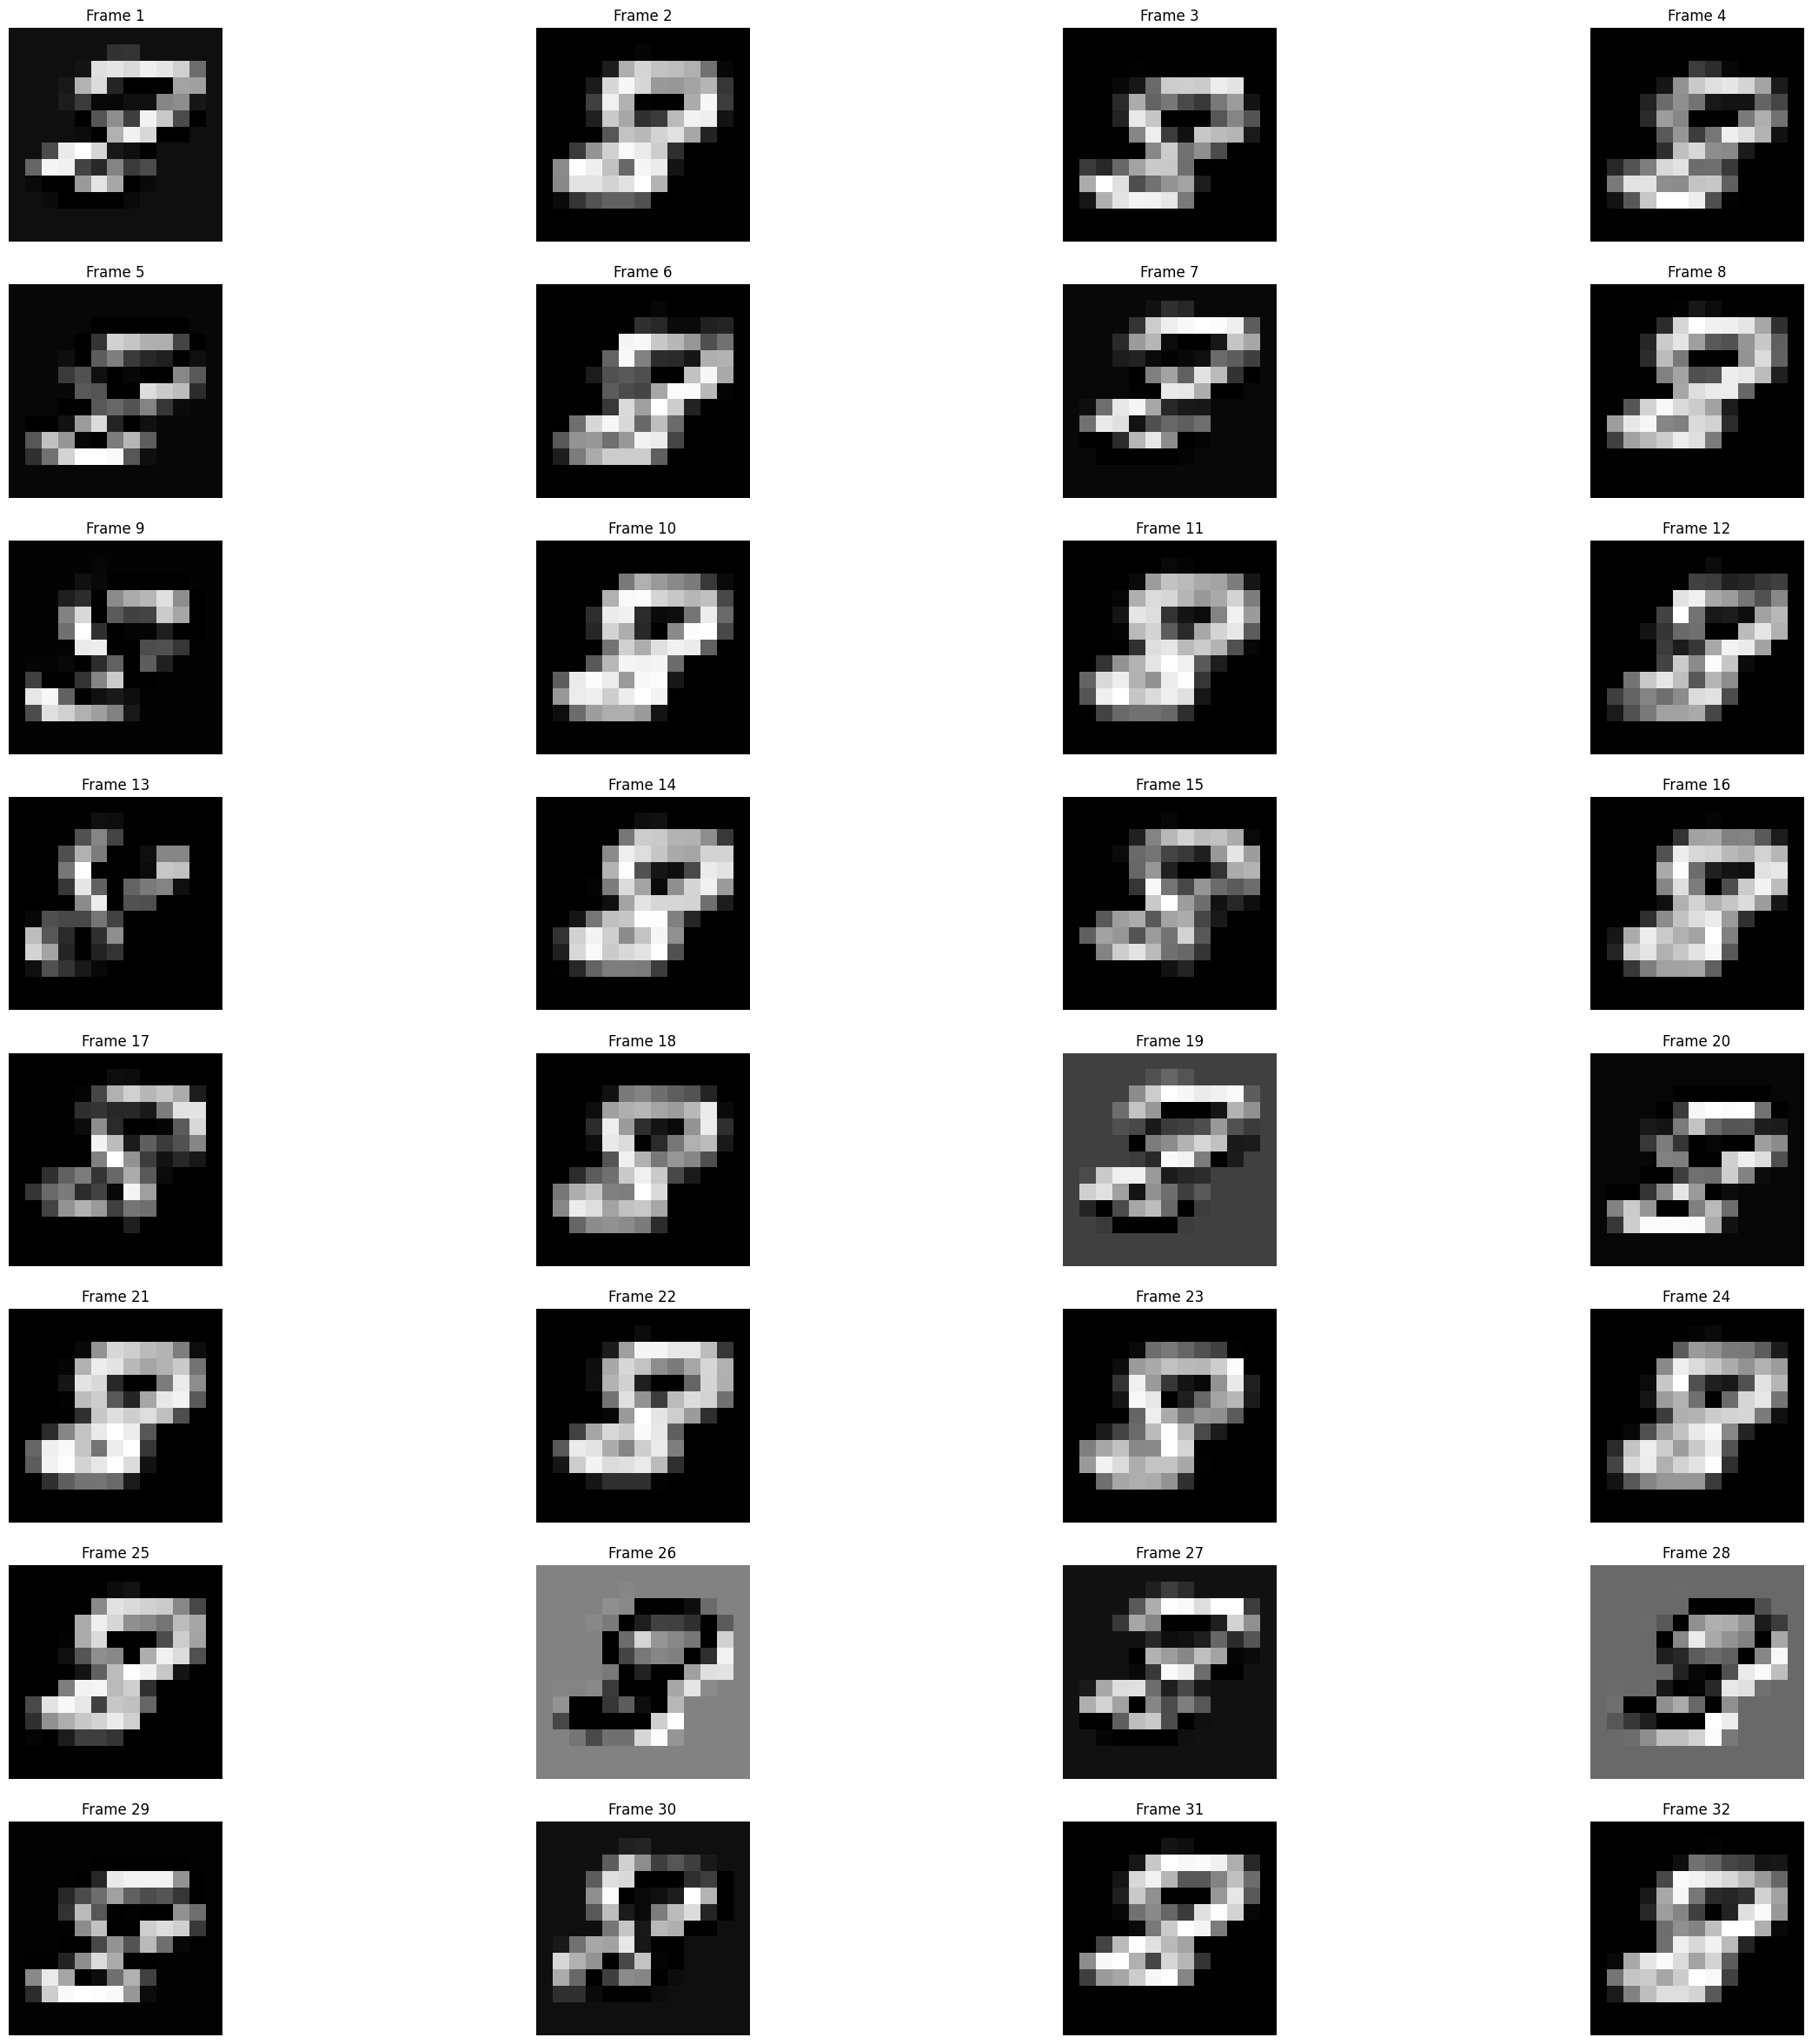

**Output of the third convolution layer.**

In [ ]:
#ENTER YOUR CODE HERE

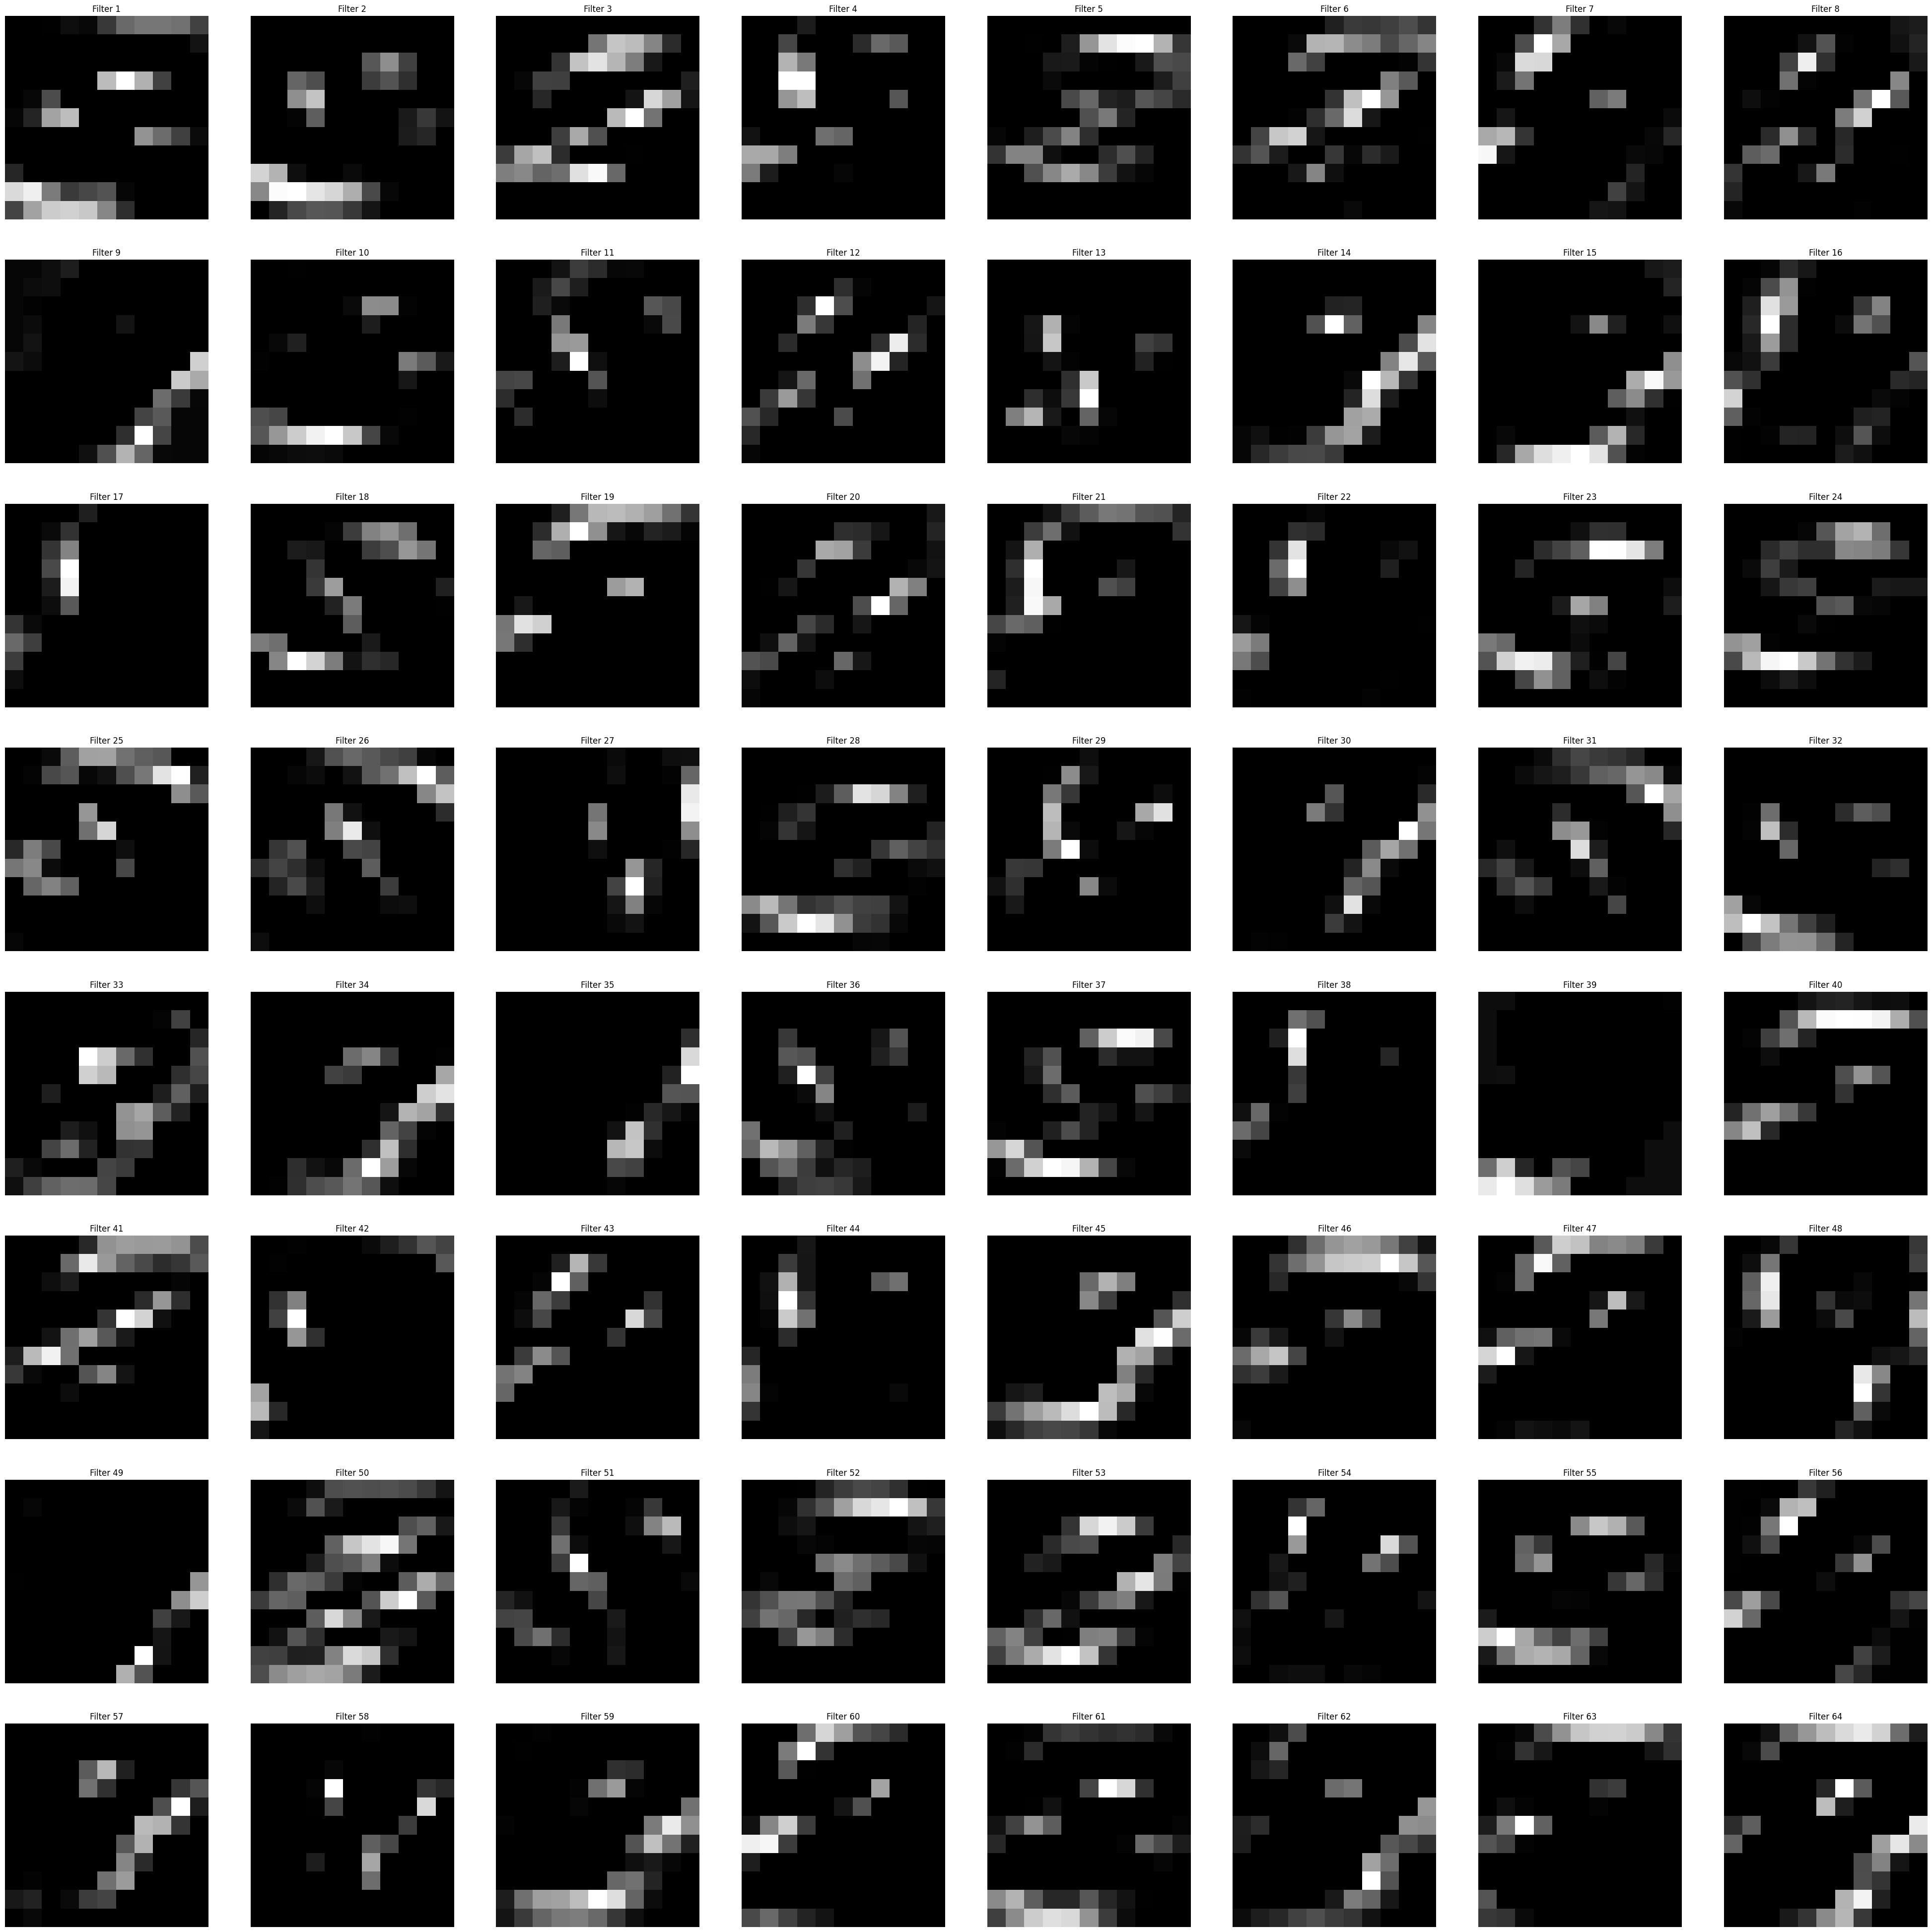

**It is now clearly visible that the each filter is extracting a particular feature.**